In [1]:
import os
import csv
import math
import re

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

In [2]:
fontsize=14
outfolder="plots"

datasets = [
    "osm_cellids_200M_uint64",
    "wiki_ts_200M_uint64",
    "books_200M_uint64",
    "fb_200M_uint64",
    "osm_cellids_400M_uint64",
    "osm_cellids_600M_uint64",
    "osm_cellids_800M_uint64",
    "books_400M_uint64",
    "books_600M_uint64",
    "books_800M_uint64",
    "books_200M_uint32",
    "normal_200M_uint32",
    "normal_200M_uint64",
    "lognormal_200M_uint32",
    "lognormal_200M_uint64",
    "uniform_dense_200M_uint32",
    "uniform_dense_200M_uint64",
    "uniform_sparse_200M_uint32",
    "uniform_sparse_200M_uint64"
]

def get_ds_name(ds):
    short_name = ds[:ds.find("_", 0, -1)]
    byte_size = re.search(r'[0-9]+$', ds, re.IGNORECASE).group()
    if short_name == "fb":
        return f"face{byte_size}"
    elif short_name == "books":
        return f"amzn{byte_size}"
    return f"{short_name}{byte_size}"

def get_ds_size(ds):
    return re.search(r'_([0-9]+M)_', ds, re.IGNORECASE).group(1)

def aggregate(data, num_bins=1000, normalize=False, cumulative=False):
    data = np.pad(data, (0, max(0, num_bins - len(data))), 'constant')
    bin_width = int(len(data) / num_bins)
    
    res = []
    total = 0
    for b in range(num_bins):
        bin_cnt = 0
        for i in range(b * bin_width, (b+1) * bin_width):
            bin_cnt += data[i]
            total += data[i]
        res.append(bin_cnt)
        
    if normalize:
        res = [float(b) / float(total) for b in res]
    
    if cumulative:
        c = 0.0
        for i, b in enumerate(res):
            c += b
            res[i] = c
        
    return res

plotting osm_cellids_200M_uint64, variant 0
plotting osm_cellids_200M_uint64, variant 1
plotting osm_cellids_200M_uint64, variant 2
plotting osm_cellids_200M_uint64, variant 3
plotting osm_cellids_200M_uint64, variant 4
plotting osm_cellids_200M_uint64, variant 5
plotting osm_cellids_200M_uint64, variant 6
plotting osm_cellids_200M_uint64, variant 7
plotting osm_cellids_200M_uint64, variant 8
plotting osm_cellids_200M_uint64, variant 9
plotting wiki_ts_200M_uint64, variant 0
plotting wiki_ts_200M_uint64, variant 1
plotting wiki_ts_200M_uint64, variant 2
plotting wiki_ts_200M_uint64, variant 3
plotting wiki_ts_200M_uint64, variant 4
plotting wiki_ts_200M_uint64, variant 5
plotting wiki_ts_200M_uint64, variant 6
plotting wiki_ts_200M_uint64, variant 7
plotting wiki_ts_200M_uint64, variant 8
plotting wiki_ts_200M_uint64, variant 9
plotting books_200M_uint64, variant 0
plotting books_200M_uint64, variant 1
plotting books_200M_uint64, variant 2
plotting books_200M_uint64, variant 3
plotting

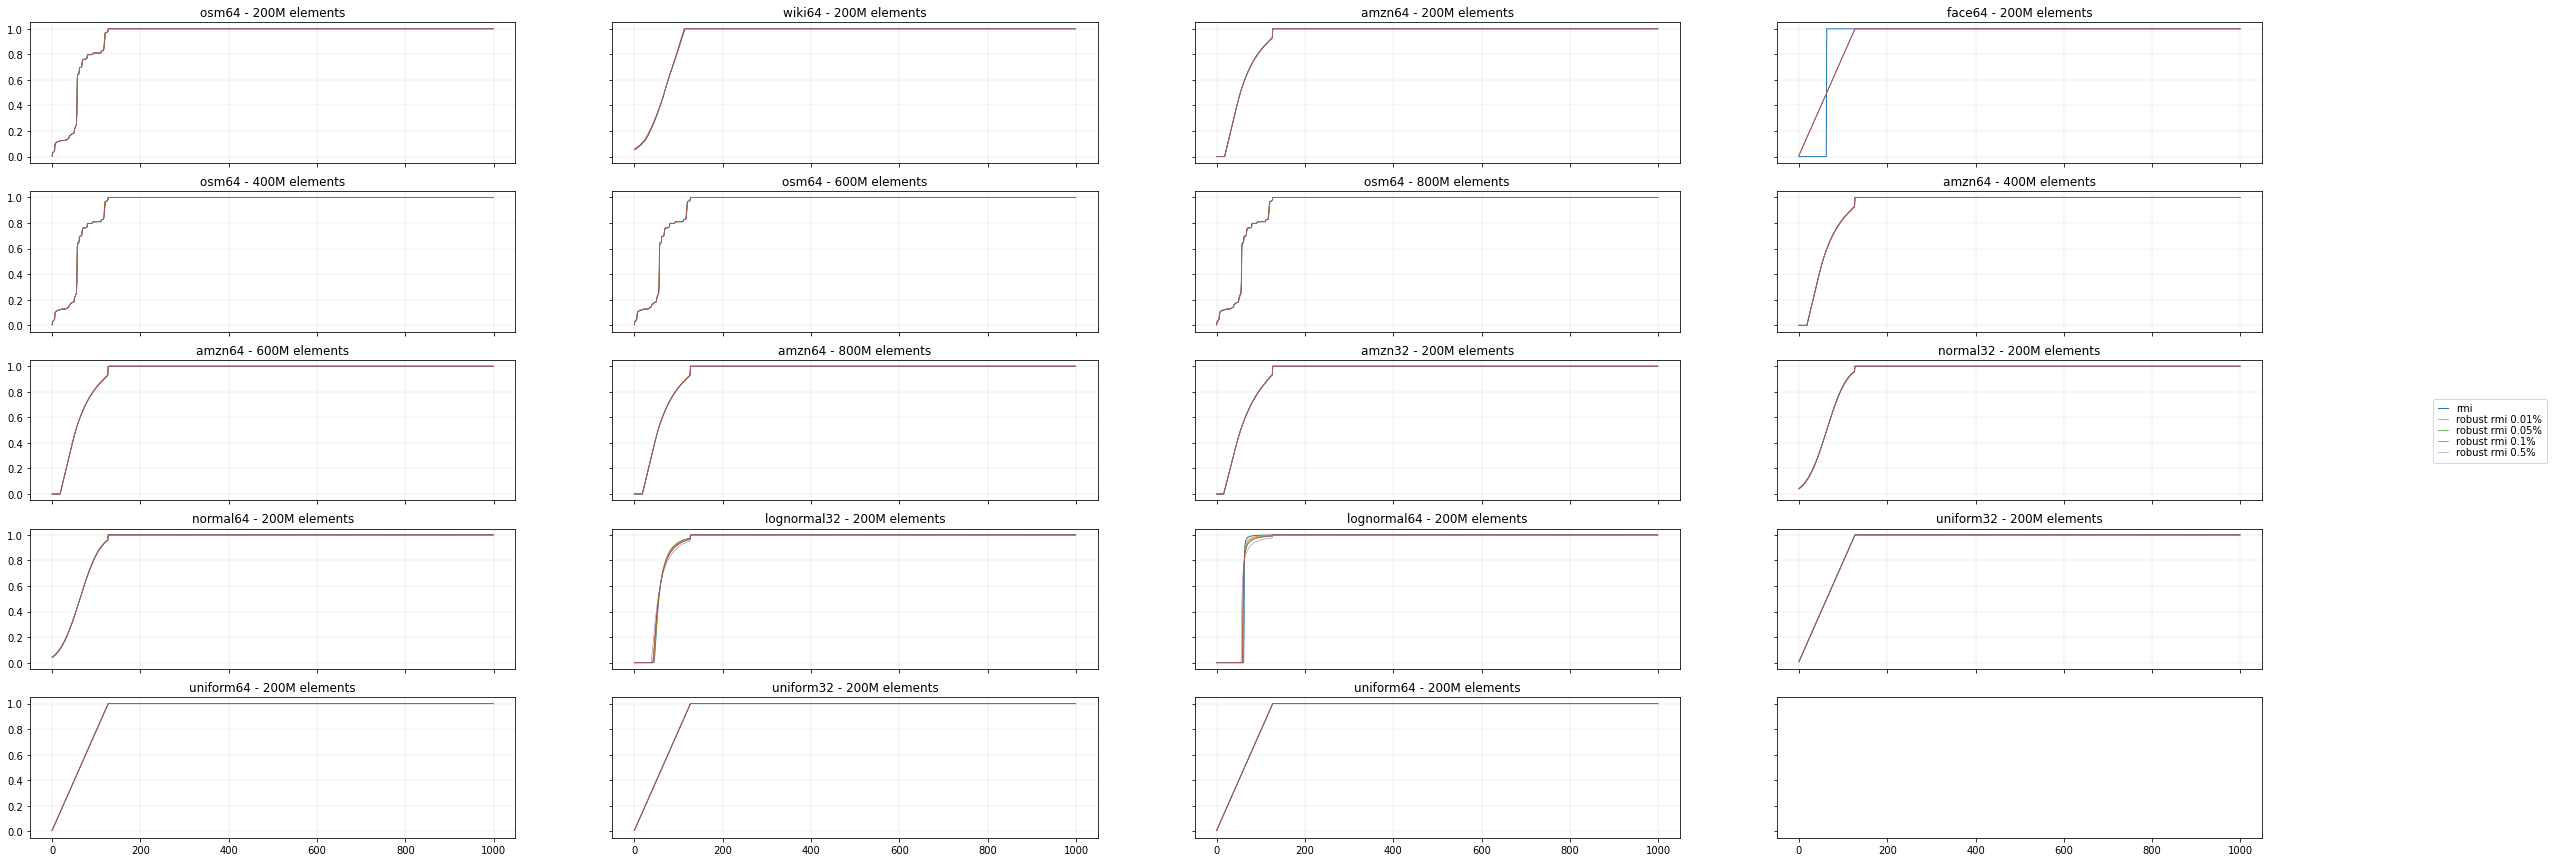

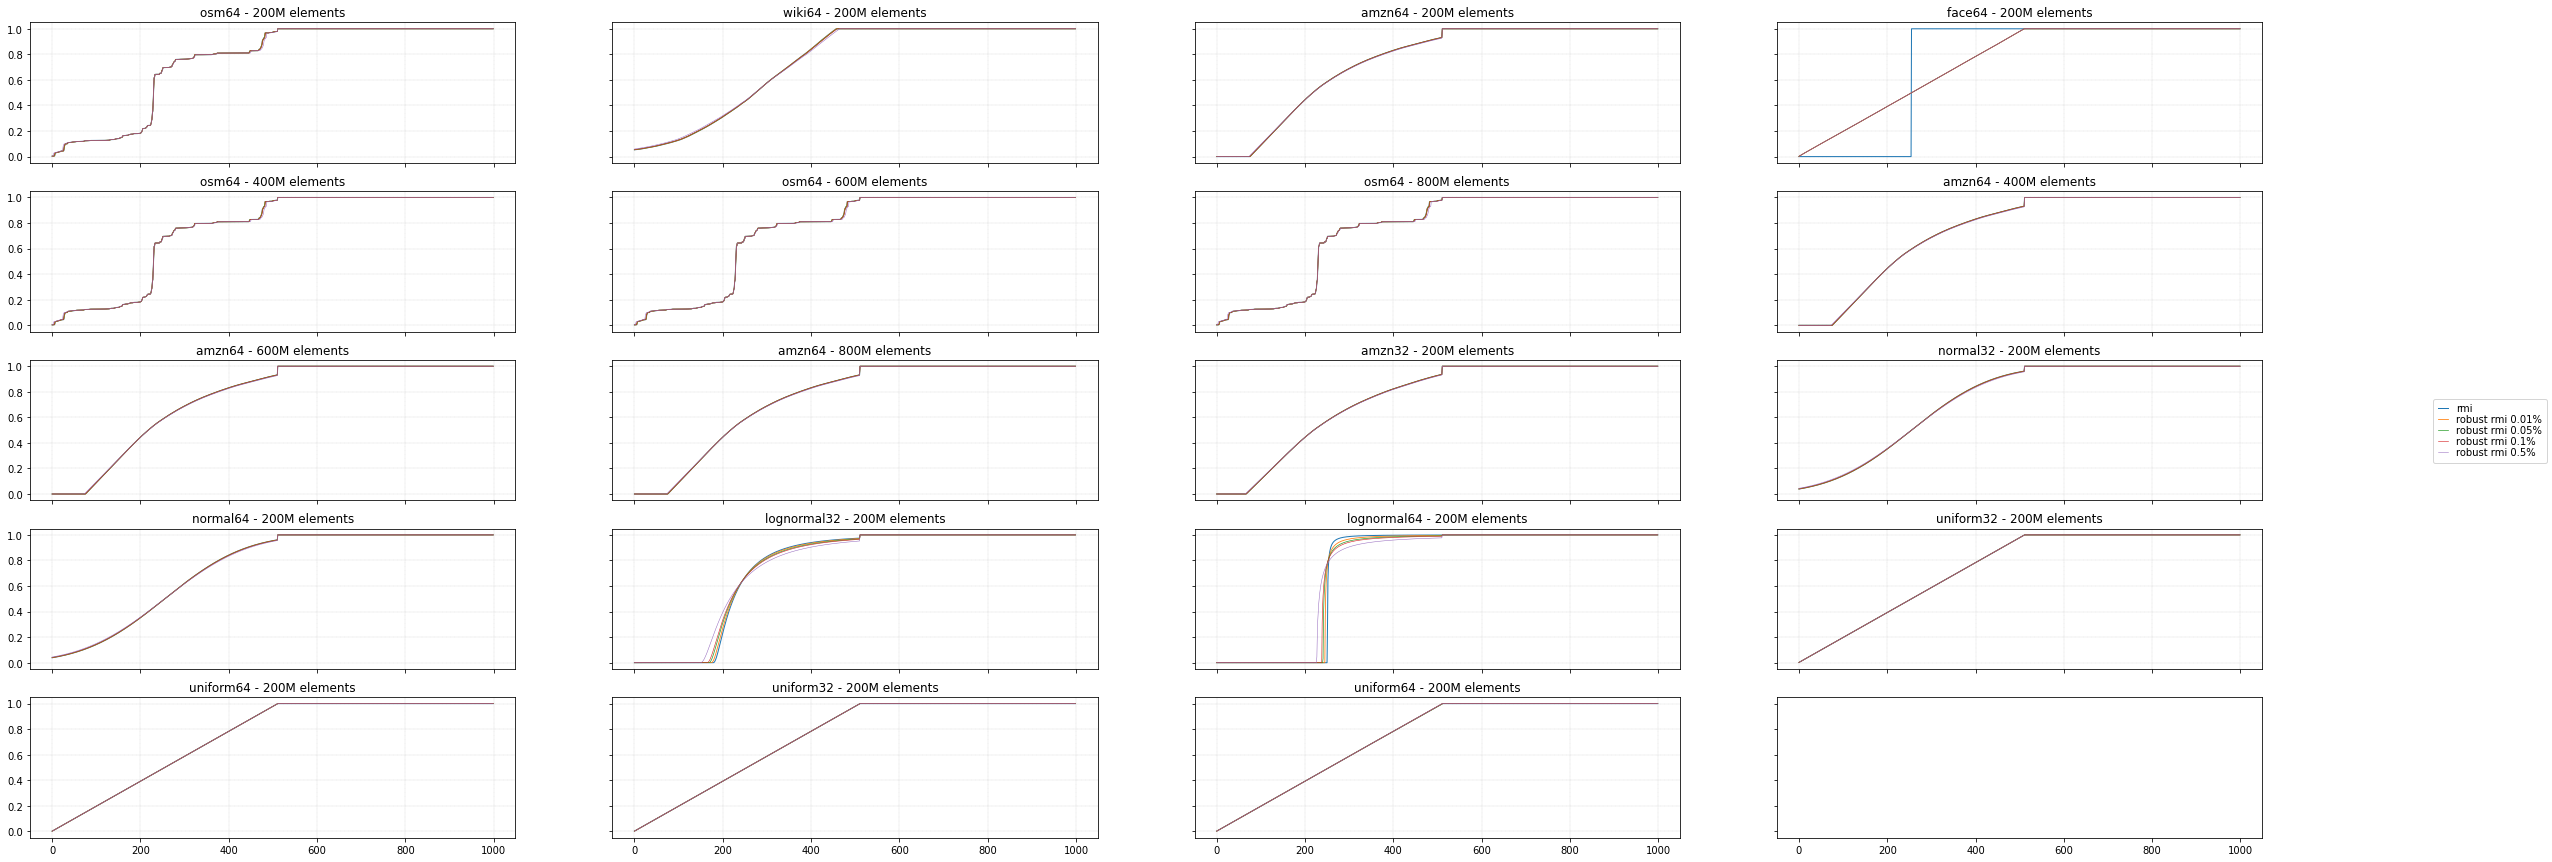

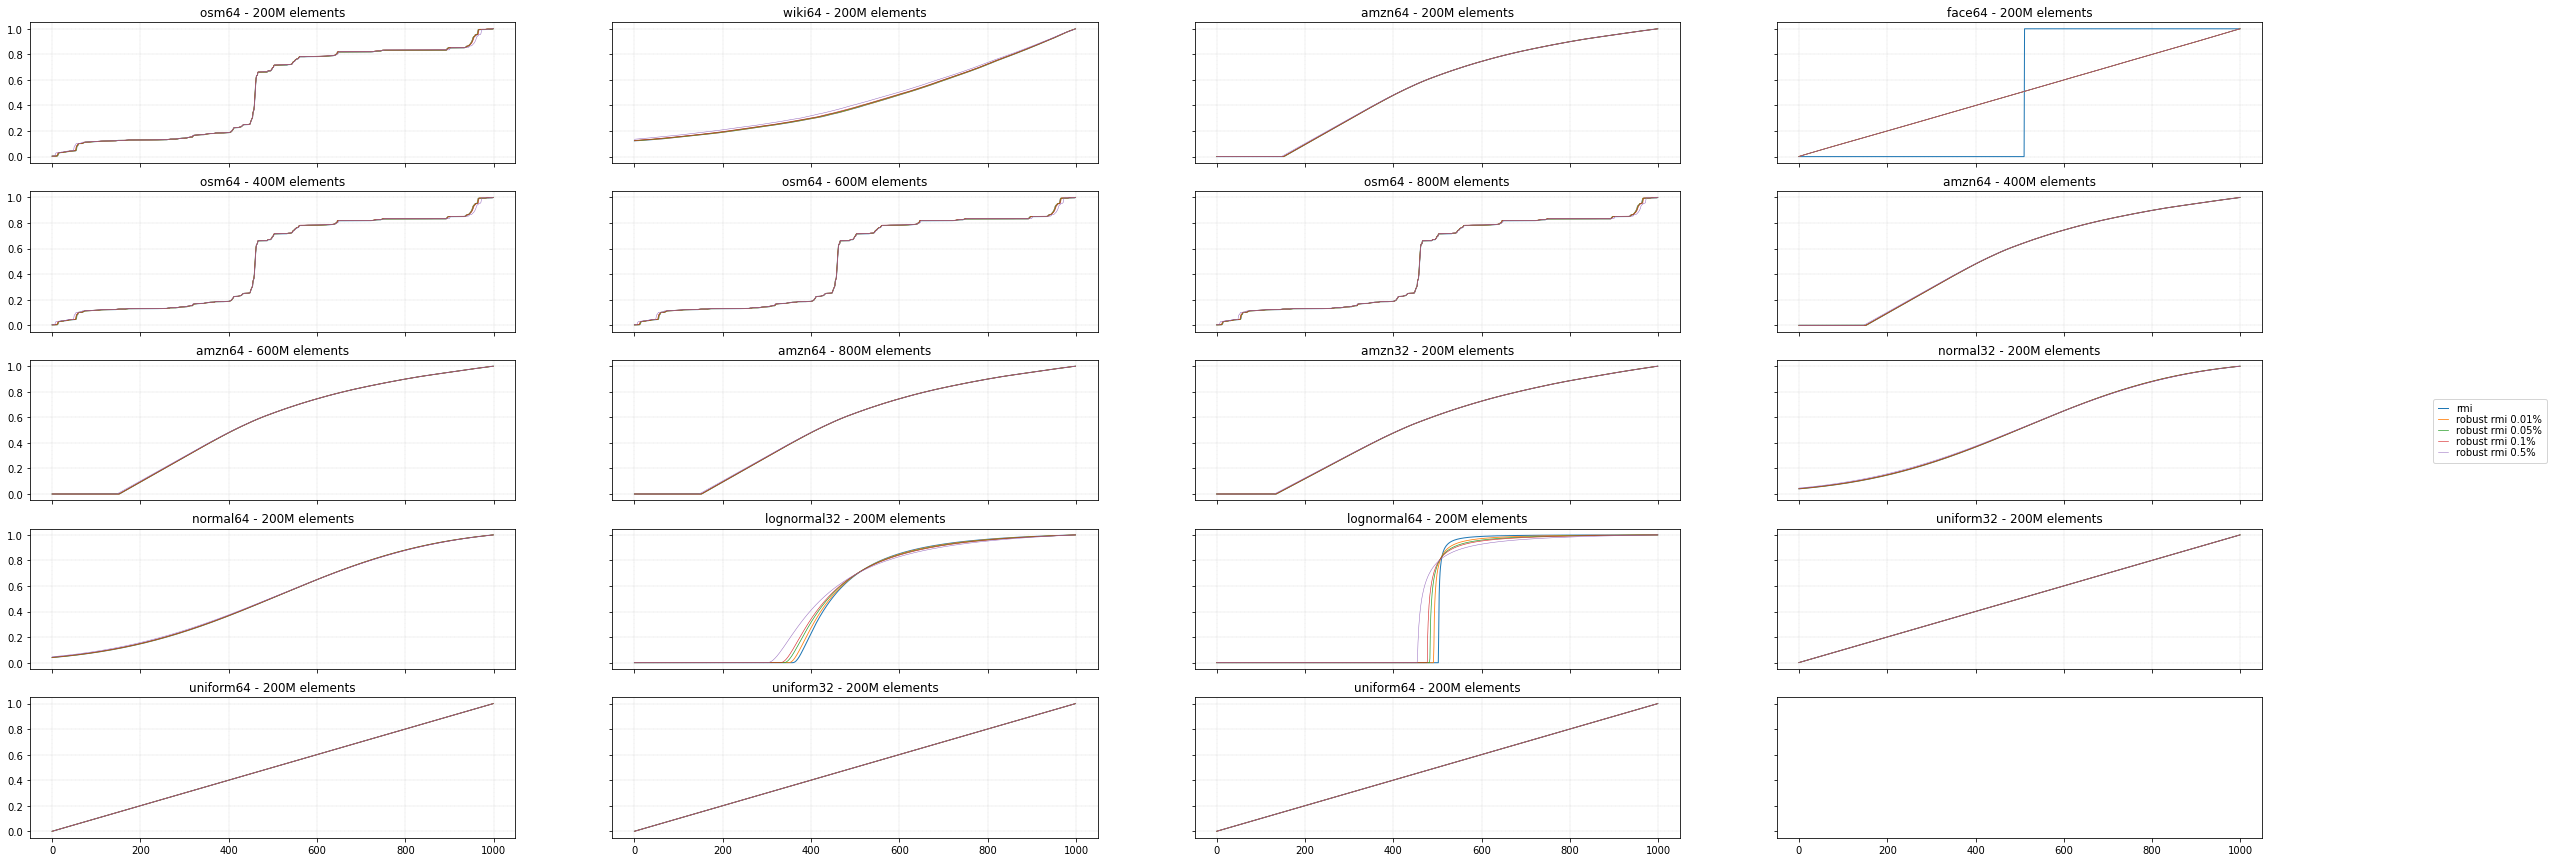

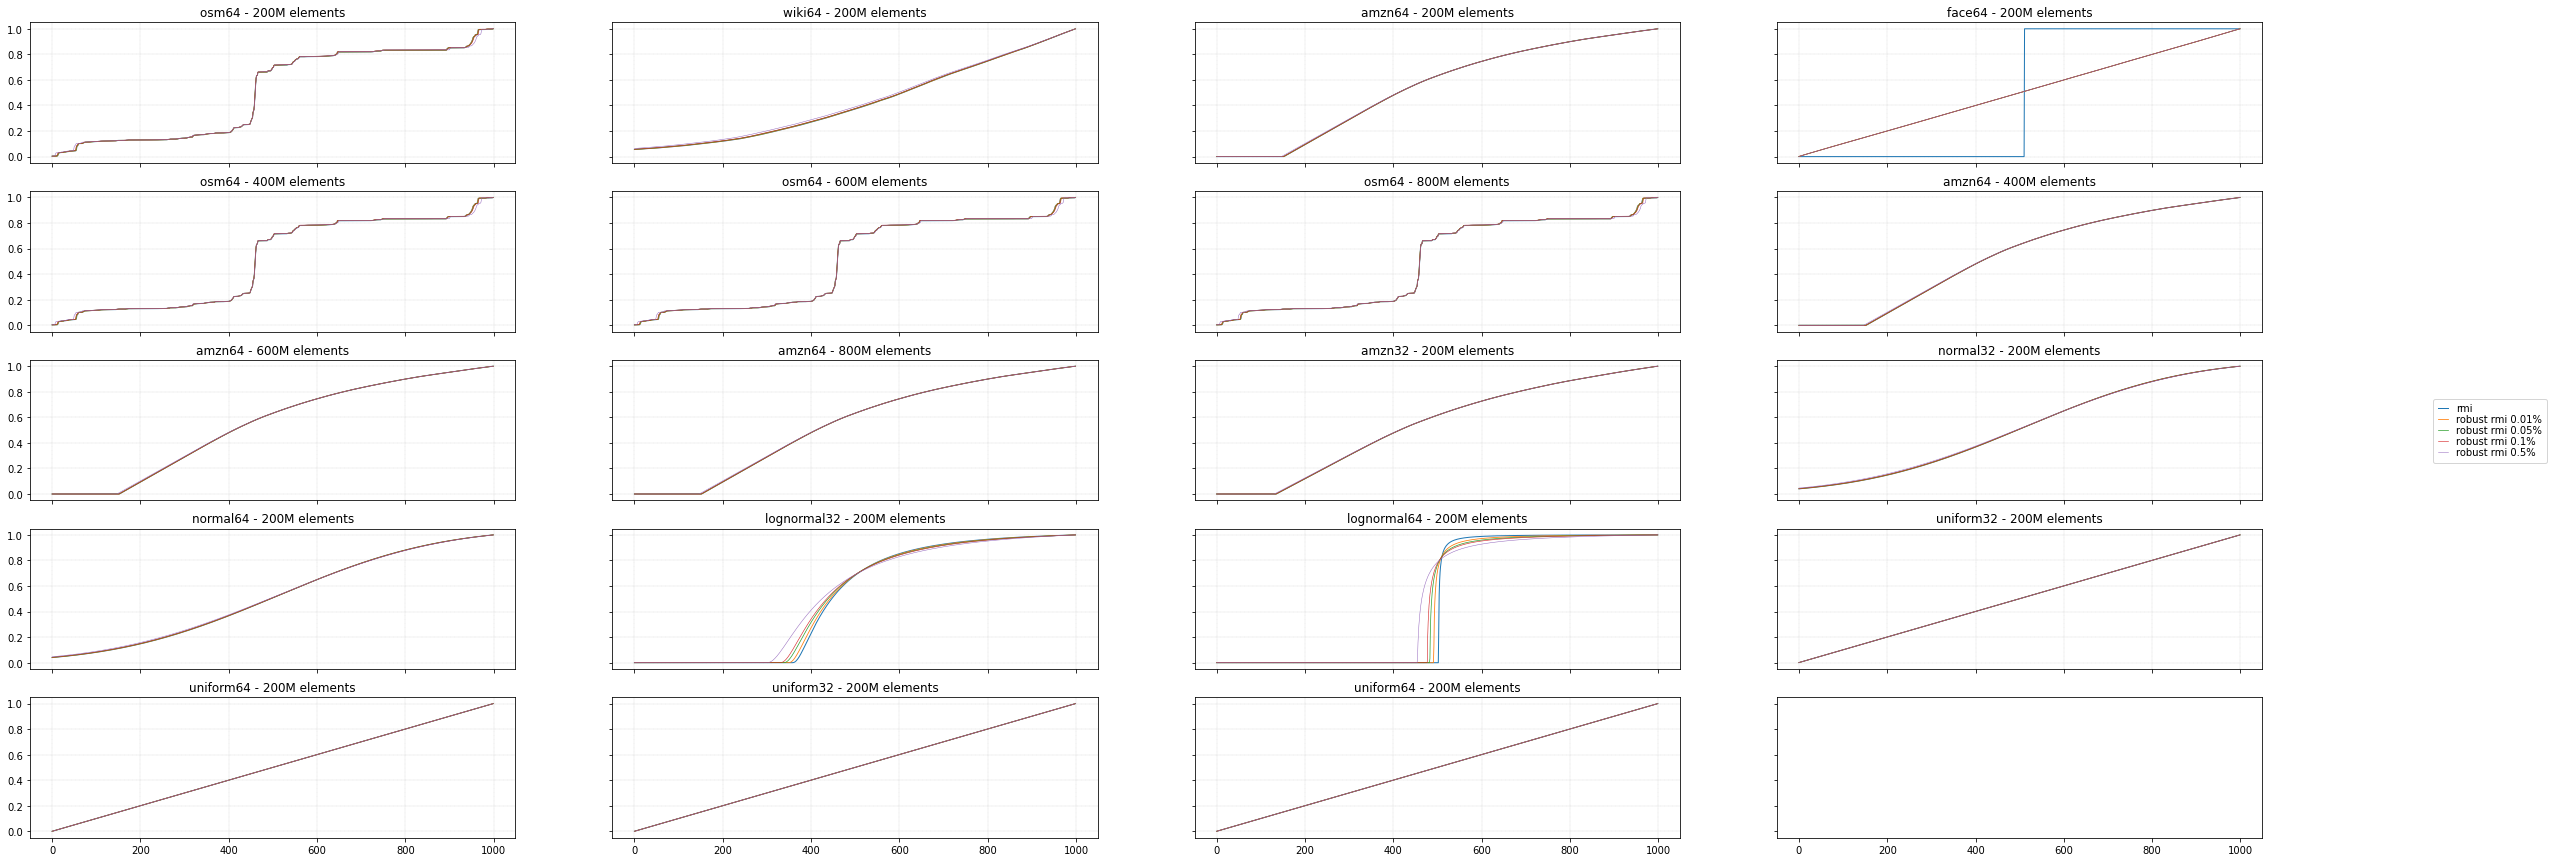

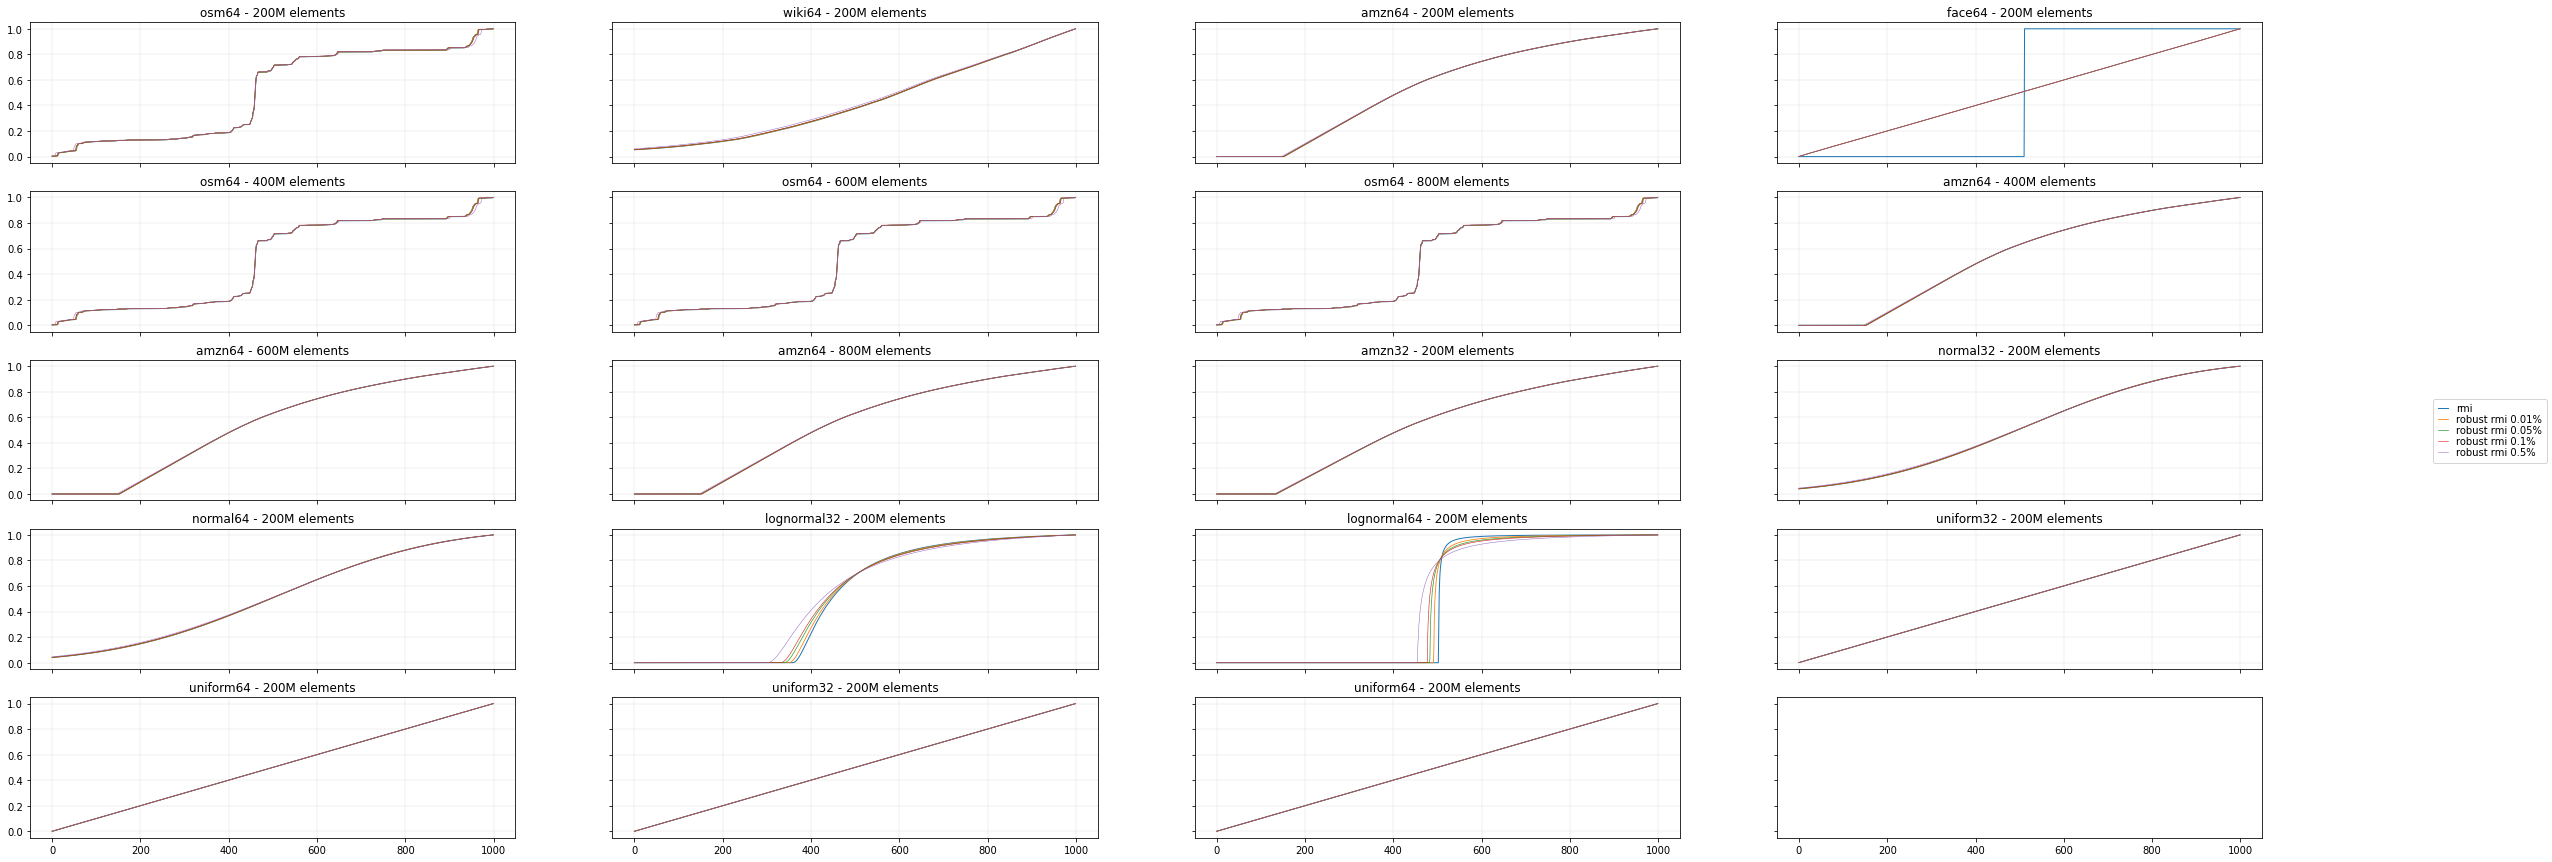

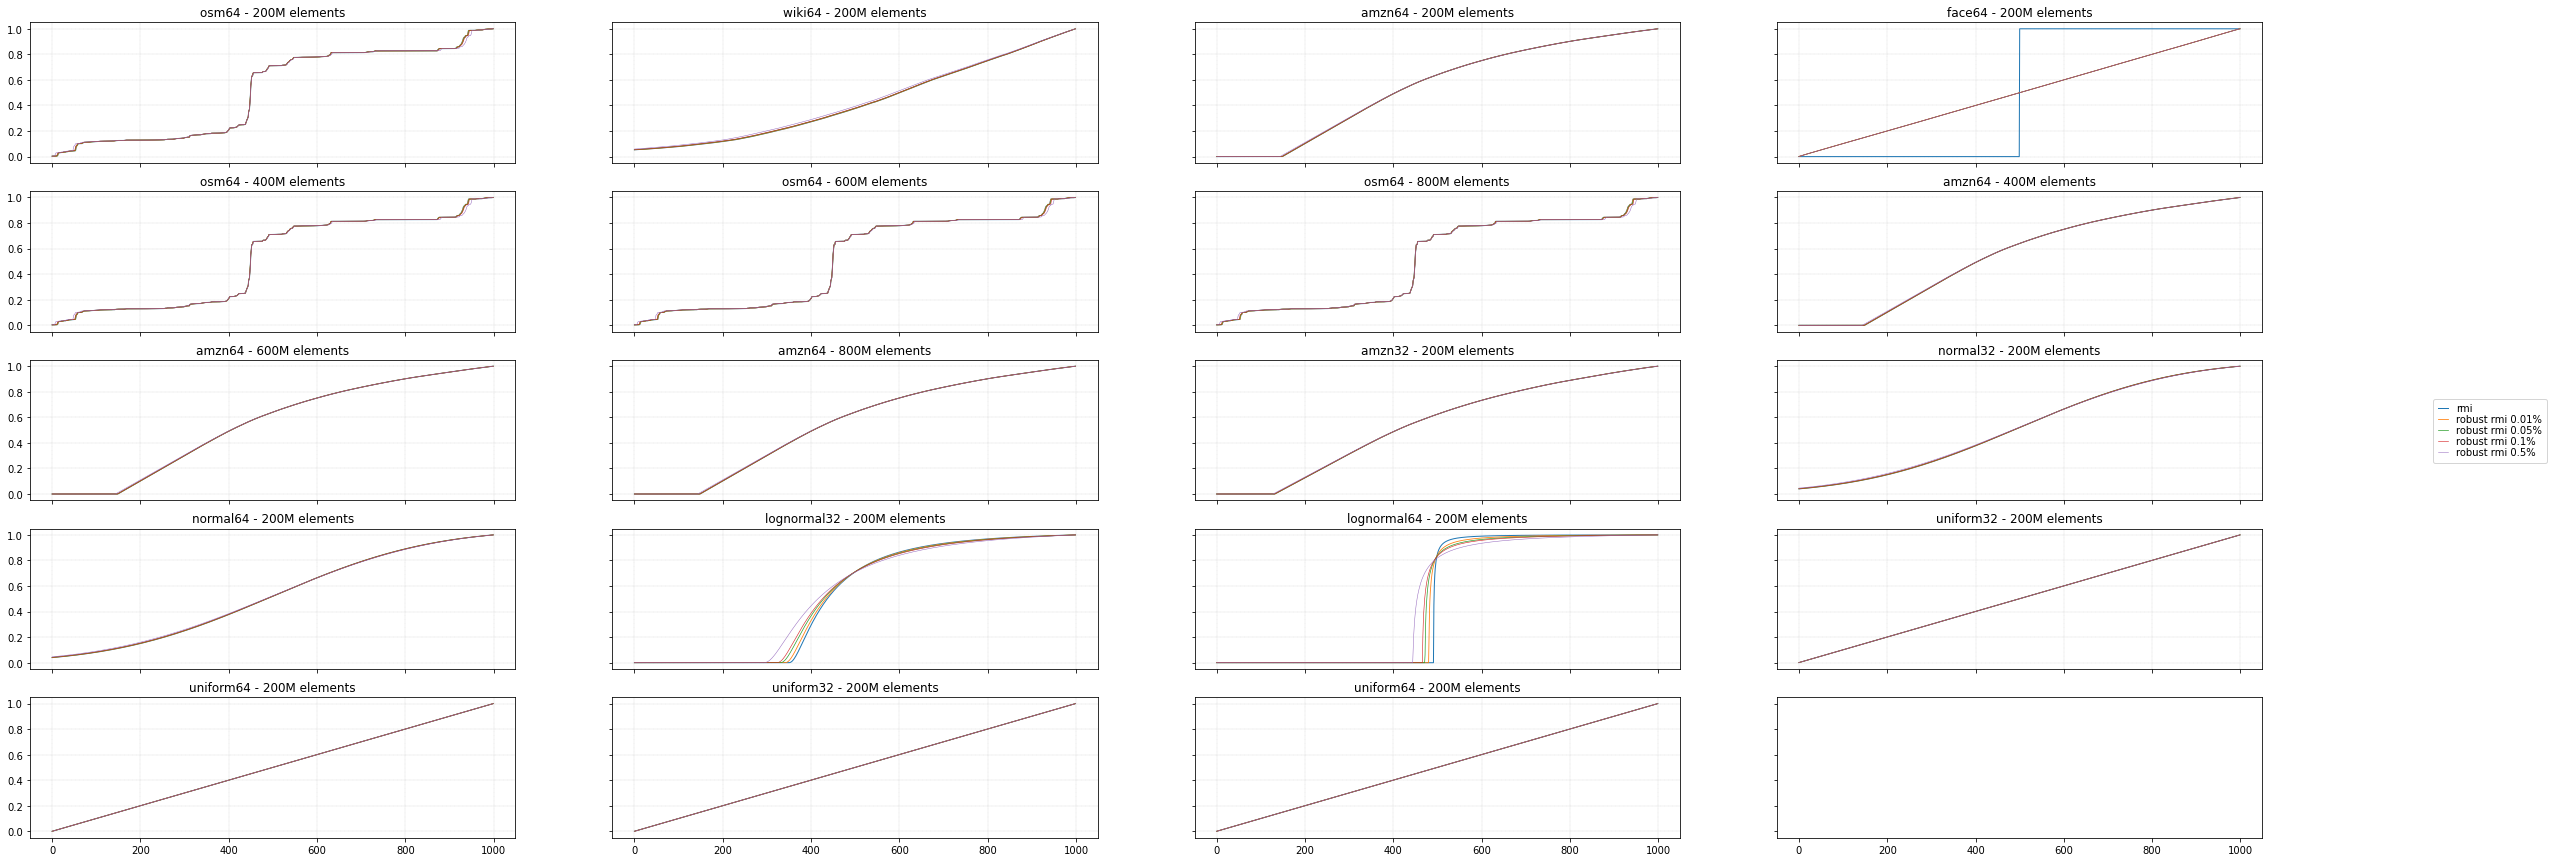

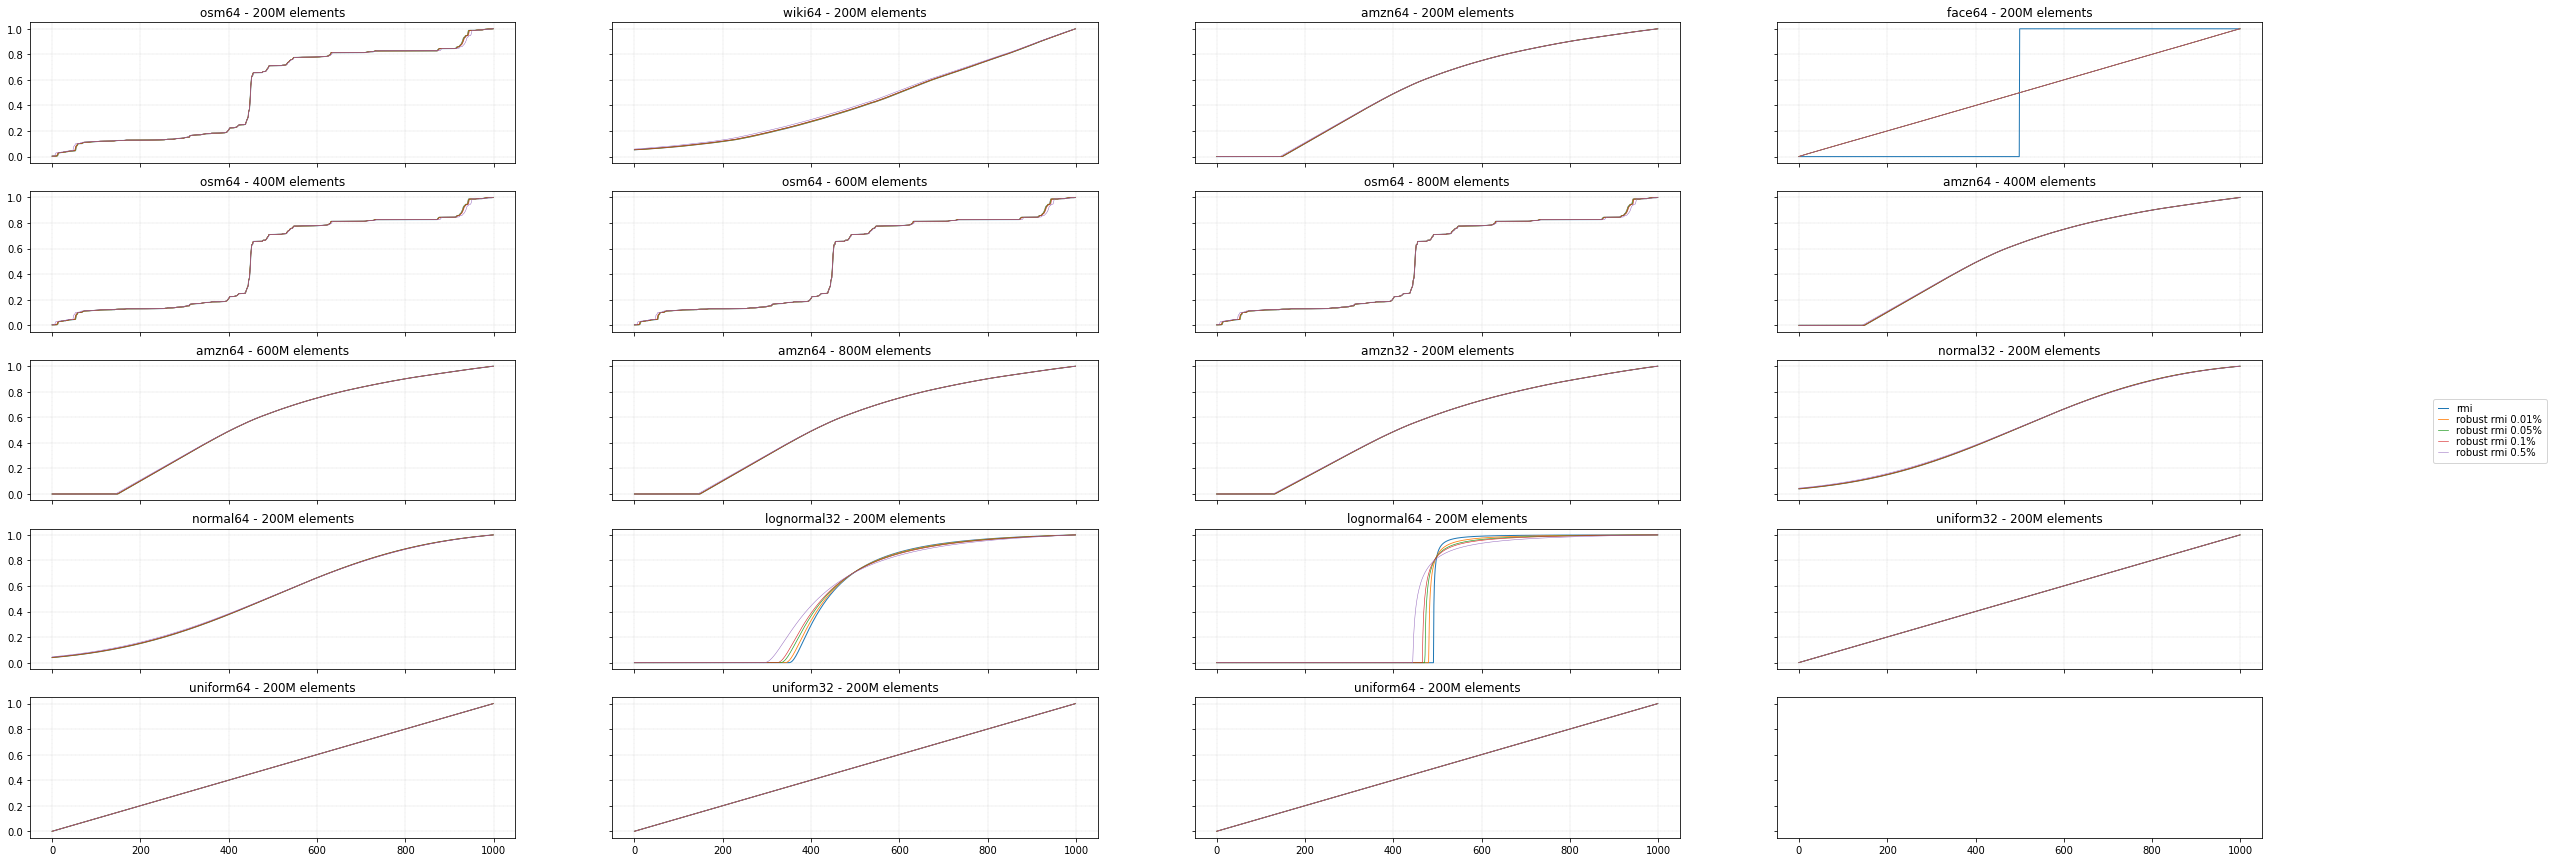

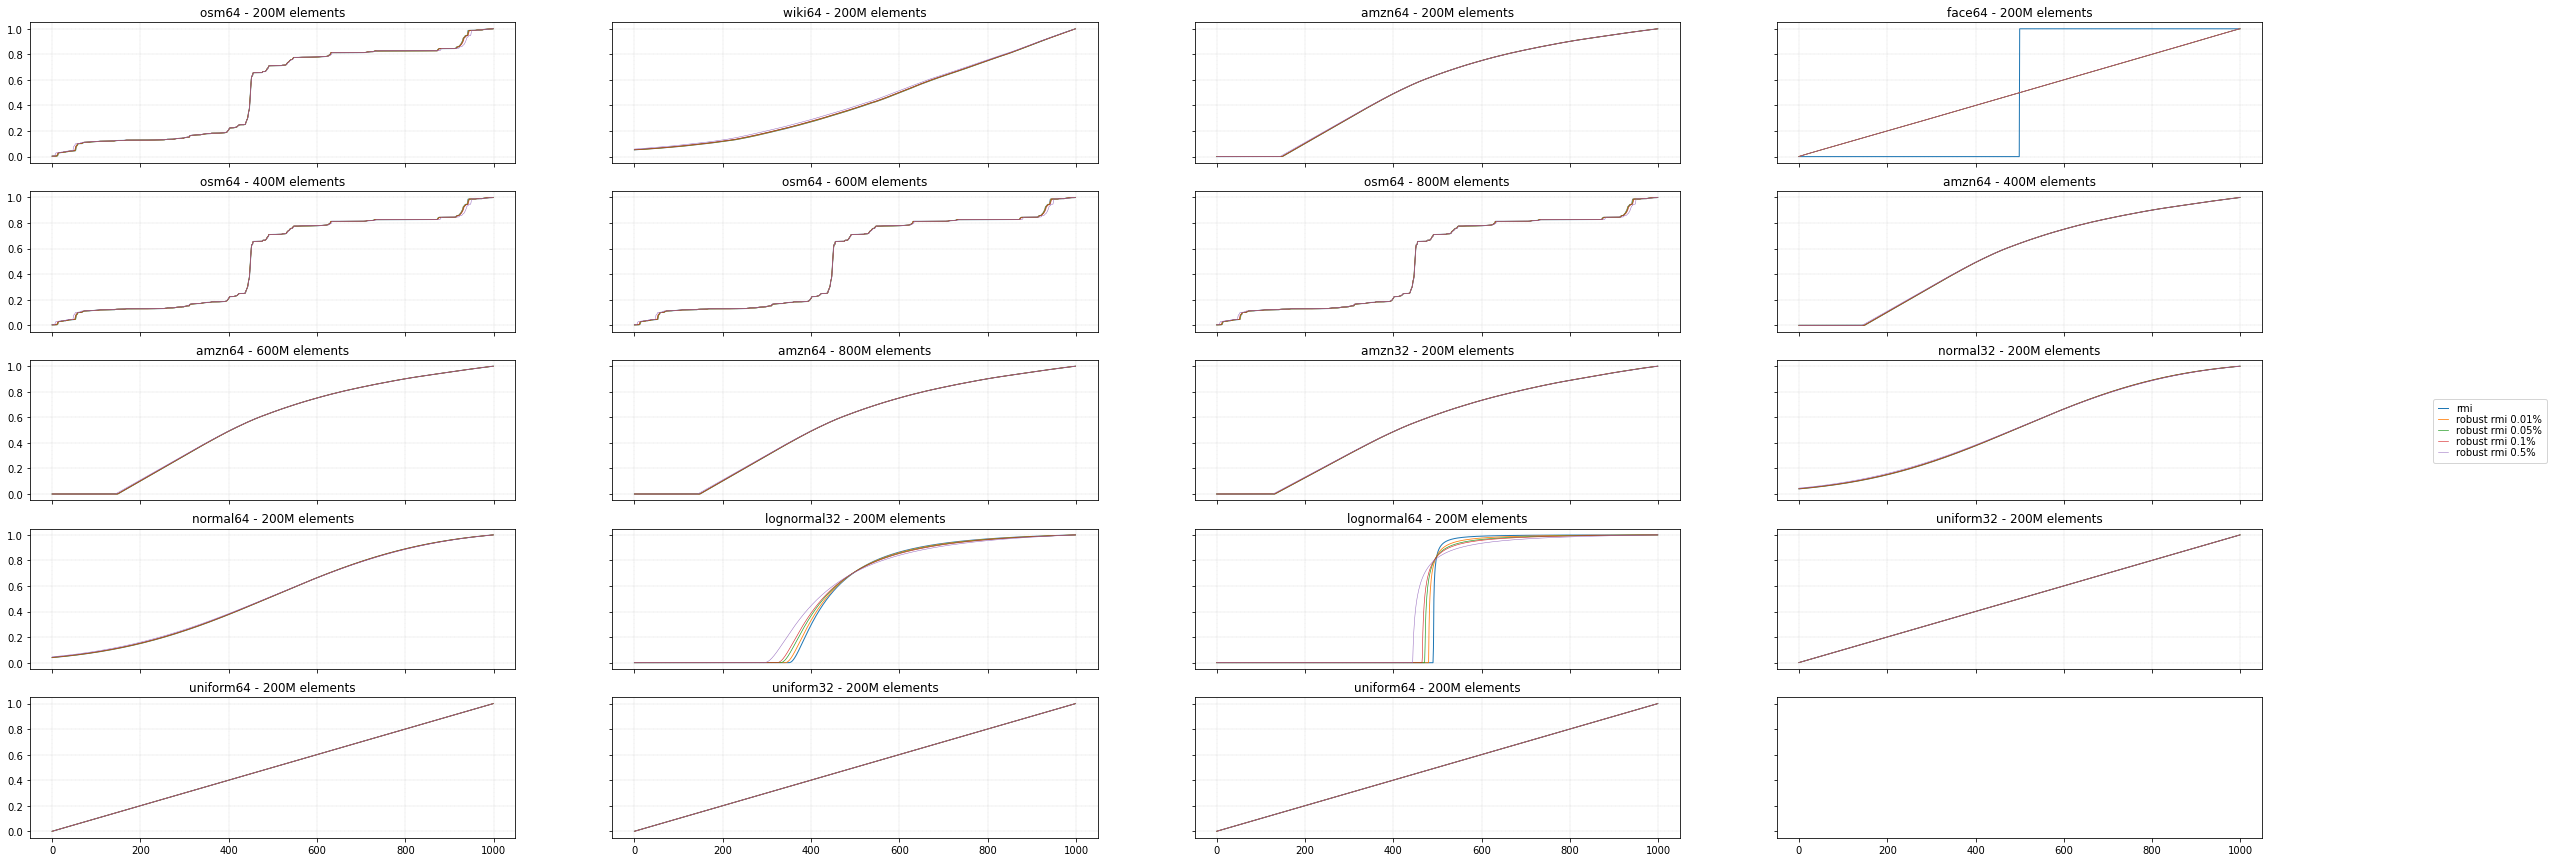

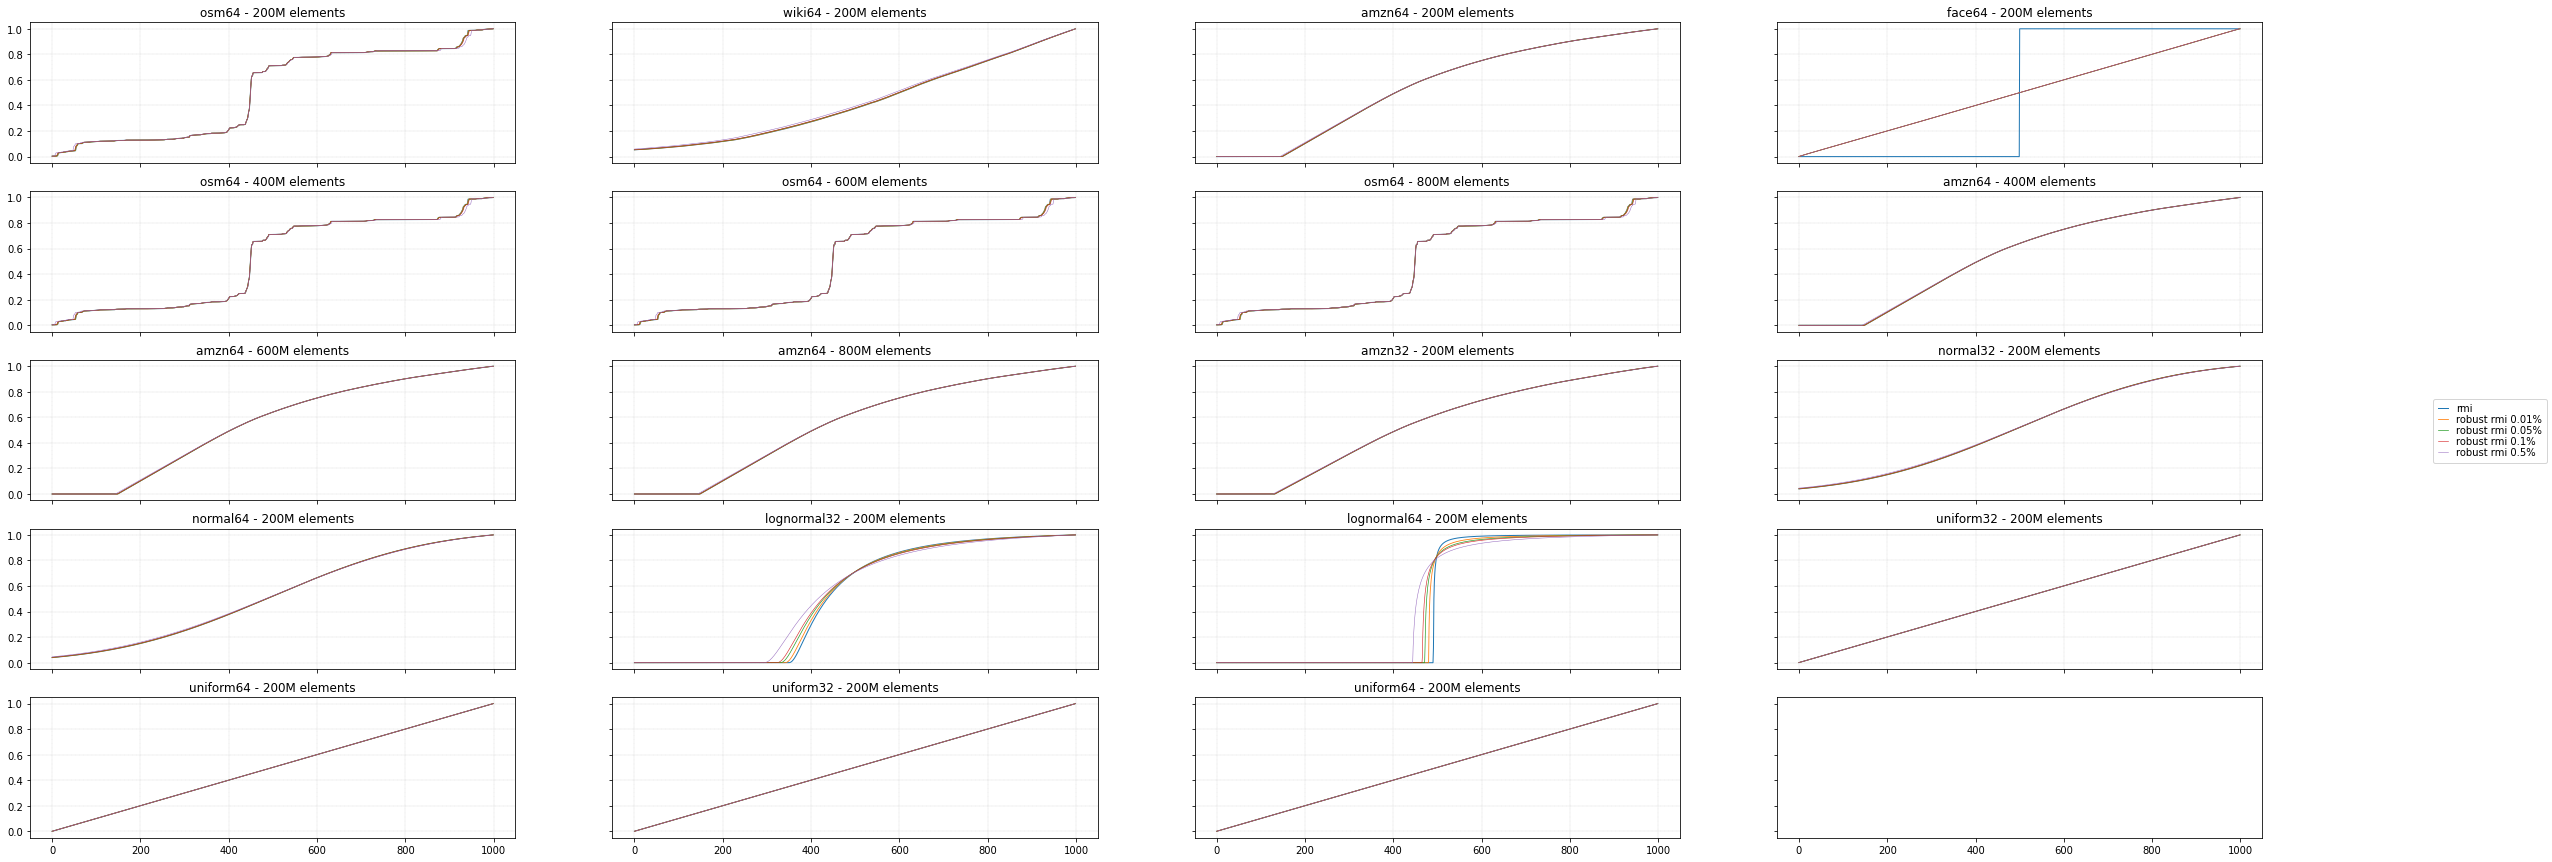

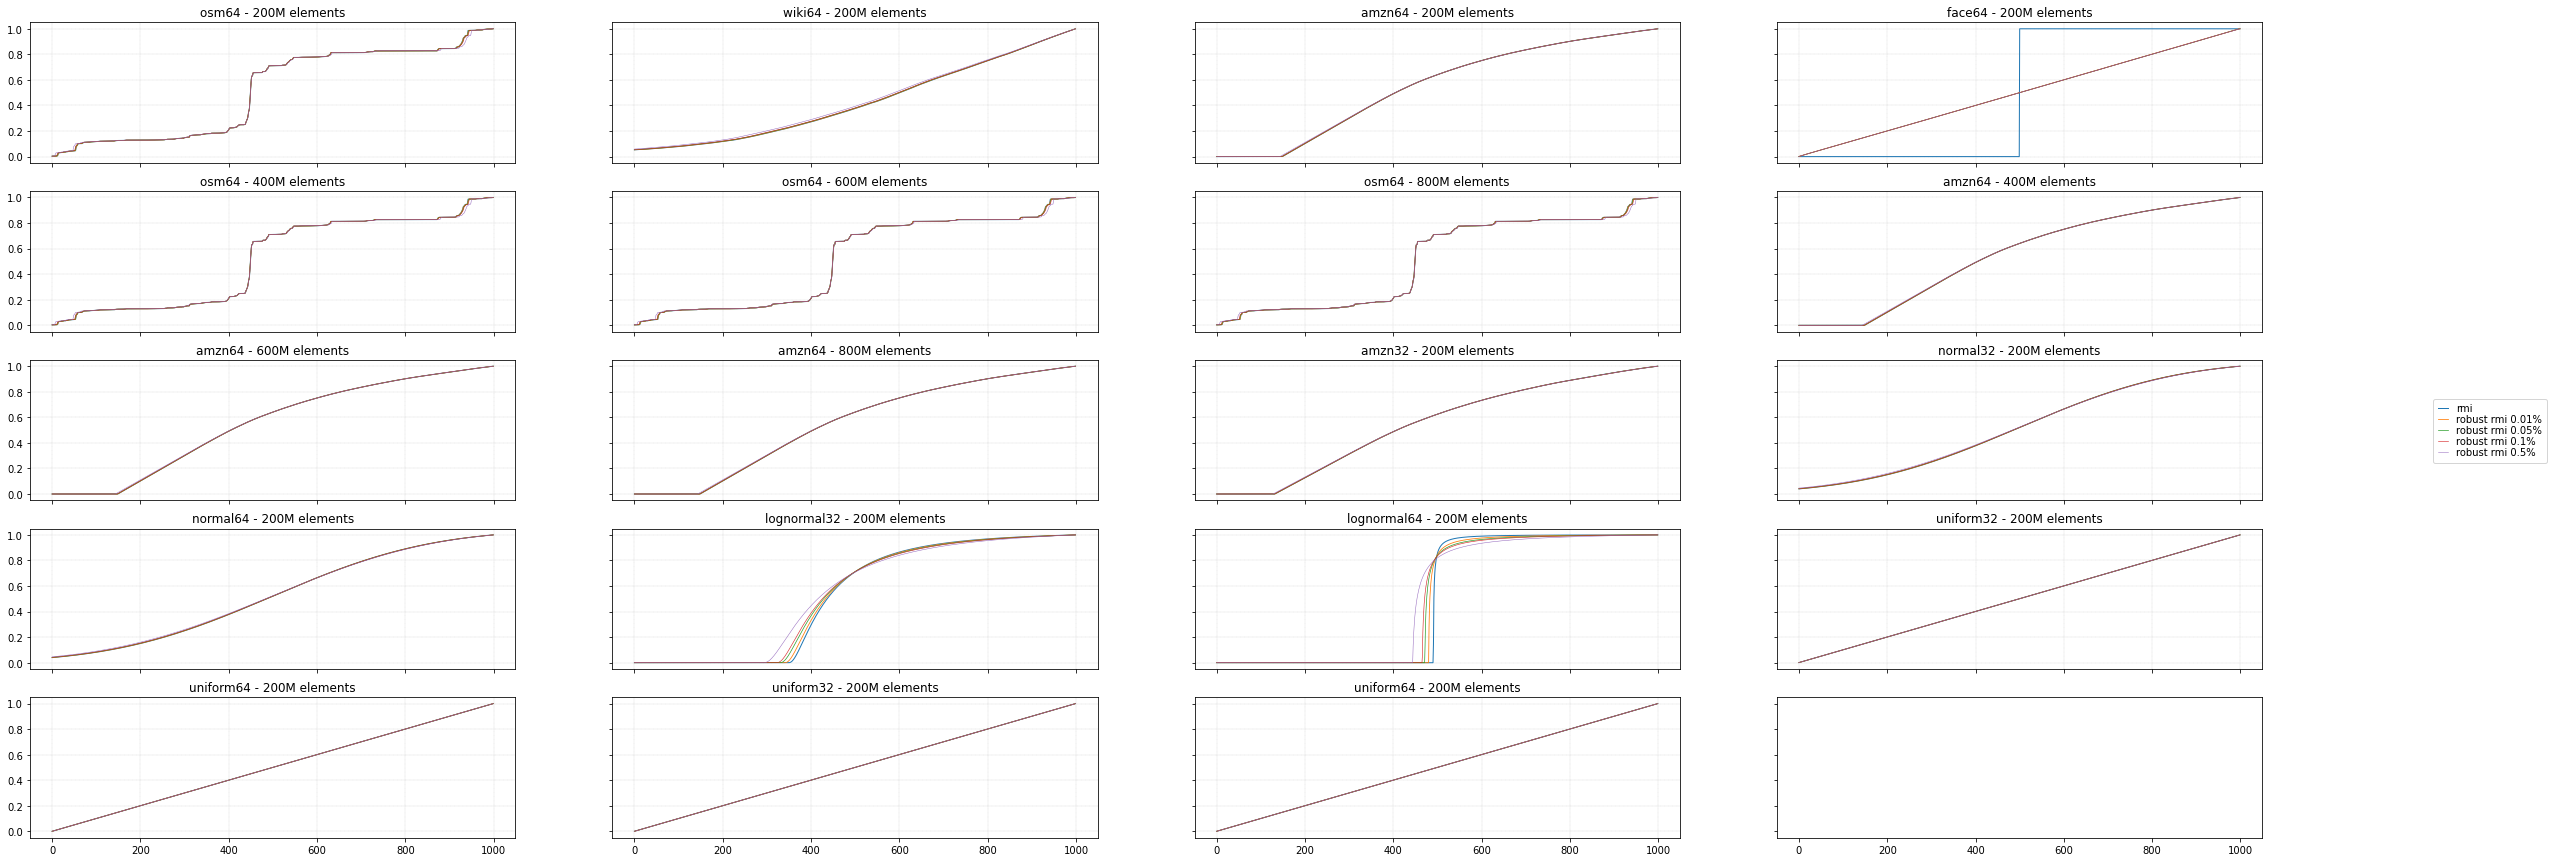

In [3]:
with open("../SOSD/results_rmi/segment_data.csv", newline="") as rmi_segs, open("../SOSD/results_rmi_robust/segment_data.csv", newline="") as rmi_robust_segs:
    filtered_ds = {ds for ds in datasets}

    variants = 10
    fig_height = 5
    fig_width = int(math.ceil(len(filtered_ds) / fig_height))
    figs = [plt.subplots(fig_height, fig_width, figsize=(10 * fig_width, 3 * fig_height), sharex=True, sharey=True) for _ in range(variants)]

    skipped = 0
    for i, dataset in enumerate(datasets):
        for v in range(variants):
            print(f"plotting {dataset}, variant {v}")
            
            fig, axs = figs[v]
                
            rmi = [int(num) for num in rmi_segs.readline().split(",")[1:-1]]
            rmi_rob_1permyriad = [int(num) for num in rmi_robust_segs.readline().split(",")[1:-1]]
            rmi_rob_5permyriad = [int(num) for num in rmi_robust_segs.readline().split(",")[1:-1]]
            rmi_rob_1permille = [int(num) for num in rmi_robust_segs.readline().split(",")[1:-1]]
            rmi_rob_5permille = [int(num) for num in rmi_robust_segs.readline().split(",")[1:-1]]
            rmi_rob_0 = [int(num) for num in rmi_robust_segs.readline().split(",")[1:-1]]
            
            if dataset not in filtered_ds and v == 0:
                skipped += 1
                continue

            x = (i - skipped) % fig_width
            y = int((i - skipped) / fig_width)
            ax = axs[y][x]
            # ax.set_yscale("log")
            ax.set_title(f"{get_ds_name(dataset)} - {get_ds_size(dataset)} elements")
            # ax.tick_params(
            #     axis='x',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False
            # )
            ax.grid(linestyle='--', linewidth=0.25)
            
            # build histogram with fixed bin size
            rmi = aggregate(rmi, normalize=True, cumulative=True)
            rmi_rob_1permyriad = aggregate(rmi_rob_1permyriad, normalize=True, cumulative=True)
            rmi_rob_5permyriad = aggregate(rmi_rob_5permyriad, normalize=True, cumulative=True)
            rmi_rob_1permille = aggregate(rmi_rob_1permille, normalize=True, cumulative=True)
            rmi_rob_5permille = aggregate(rmi_rob_5permille, normalize=True, cumulative=True)
            
            ax.plot(rmi, label="rmi", linewidth=1.0)
            ax.plot(rmi_rob_1permyriad, label="robust rmi 0.01%", linewidth=0.8)
            ax.plot(rmi_rob_5permyriad, label="robust rmi 0.05%", linewidth=0.7)
            ax.plot(rmi_rob_1permille, label="robust rmi 0.1%", linewidth=0.6)
            ax.plot(rmi_rob_5permille, label="robust rmi 0.5%", linewidth=0.5)

            # label_pos = np.arange(len(rmi))
            # bar_width = 1.0 / 7.0
            # ax.bar(label_pos - 2.5 * bar_width, rmi, bar_width, label="rmi")
            # ax.bar(label_pos - 1.5 * bar_width, rmi_rob_1permyriad, bar_width, label="rmi robust 0.01%")
            # ax.bar(label_pos - 0.5 * bar_width, rmi_rob_5permyriad, bar_width, label="rmi robust 0.05%")
            # ax.bar(label_pos + 0.5 * bar_width, rmi_rob_1permille, bar_width, label="rmi robust 0.1%")
            # ax.bar(label_pos + 1.5 * bar_width, rmi_rob_5permille, bar_width, label="rmi robust 0.5%")
            # ax.bar(label_pos + 2.5 * bar_width, rmi_rob_0, bar_width, label="rmi robust 0%")
    
    for v, (fig, axs) in enumerate(figs):
        handles, labels = axs[0][0].get_legend_handles_labels()
        fig.legend(handles, labels, ncol=1, loc="center right", labelspacing=0.1, borderpad=0.5, handlelength=1)
        fig.savefig(f"./plots/rmi_segments_{v}.pdf")